In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Machine Learning on the ArXiv

This notebook produces the plots and analysis presented in the paper "The (non)-neutrality of science and algorithms:  Machine Learning between fundamental physics and society". 

The goal is to understand the growht rate of publications on Machine Learning, Deep Learning and Neural Networks in physics in the last 10 years and its reasons. See sec. 4.1 of the paper for a discussion. 


Data are available upon request, or can be downloaded using the arxiv API (a script is provided in this repo)

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
plt.style.use('ggplot')

### Import data and get some info/preview

In [3]:
%%bash
ls data/

2018
2019
Copy of papers_per_year.gsheet
old
papers_per_year.csv
papers_per_year.gsheet
papers_per_year_2019.csv
papers_per_year_copy.csv


#### Data until 2018

In [4]:
df_NN_2018 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2018/*neural+networks*.csv')])
df_ML_2018 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2018/*machine+learning*.csv')])
df_DL_2018 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2018/*deep+learning*.csv')])

#### Data until 2019

In [5]:
df_NN_2019 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2019/*neural+network*.csv')])
df_ML_2019 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2019/*machine+learning*.csv')])
df_DL_2019 = pd.concat([pd.read_csv(f) for f in glob.glob('data/2019/*deep+learning*.csv')])

#### Combine the two if needed 
For the plots in the paper, we used just the data until 2018

In [6]:
df_NN = df_NN_2018#pd.concat([df_NN_2018, df_NN_2019])
df_ML = df_ML_2018#pd.concat([df_ML_2018, df_ML_2019])
df_DL = df_DL_2018#pd.concat([df_DL_2018, df_DL_2019])

In [7]:
df_NN.to_csv('/Users/Michi/Dropbox/Local/Physics_projects/MLg/data/arxiv_NN.csv', index=False)
df_ML.to_csv('/Users/Michi/Dropbox/Local/Physics_projects/MLg/data/arxiv_ML.csv', index=False)
df_DL.to_csv('/Users/Michi/Dropbox/Local/Physics_projects/MLg/data/arxiv_DL.csv', index=False)

In [8]:
df_NN.shape[0]

38044

In [9]:
#df_ML = pd.read_csv('data/query_at_2018-09-10_18:18_abs:machine+learning.csv')
#df_DL = pd.read_csv('data/query_at_2018-09-10_17:55_abs:deep+learning.csv')
#df_NN = pd.read_csv('data/query_abs:neural_networks_complete.csv')

df_all = [df_ML, df_NN, df_DL]
df_names = ['Machine Learning', 'Neural Networks', 'Deep Learning']


for i in range(len(df_all)):
    print(df_names[i]+' - N. of papers: %s' %df_all[i].shape[0] )
print('Total papers: %s' %np.sum([df.shape[0] for df in df_all]))

Machine Learning - N. of papers: 11637
Neural Networks - N. of papers: 38044
Deep Learning - N. of papers: 7716
Total papers: 57397


Note: due to multiple versions, or badly handled queries with arXiv API, there may be a lot of multiple entries. Let's look for them 

Remove 'v1', 'v2', etc and keep arxiv main ID only

In [10]:
my_id = '1809.02601'
id_list=[]
for i in range(5):
    id_list.append(my_id+'v%s'%i)
id_full = [my_id]+id_list

print(id_full)
print([df_NN['ID'].isin([idn]).sum() for idn in id_full])


['1809.02601', '1809.02601v0', '1809.02601v1', '1809.02601v2', '1809.02601v3', '1809.02601v4']
[0, 0, 2, 0, 0, 0]


In [11]:
def strip_id(my_id):
    sep='v'
    return my_id.split(sep, 1)[0]

strip_id('1809.02601v4')

'1809.02601'

In [12]:
for df in df_all:
    df['ID'] = df.ID.apply(lambda x: strip_id(x))

In [13]:
my_id = '1809.02601'
id_list=[]
for i in range(5):
    id_list.append(my_id+'v%s'%i)
id_full = [my_id]+id_list

print(id_full)
print([df_NN['ID'].isin([idn]).sum() for idn in id_full])


['1809.02601', '1809.02601v0', '1809.02601v1', '1809.02601v2', '1809.02601v3', '1809.02601v4']
[2, 0, 0, 0, 0, 0]


Check for duplicates

In [14]:
for df in df_all:
    print(df.duplicated('ID').sum())

1628
19143
1505


In [15]:
# df_NN[df_NN.duplicated('ID')==True]

Remove duplicates (and papers from 2020 if you include the 2019 data)

In [16]:
df_NN = df_NN.drop_duplicates('ID')
df_ML = df_ML.drop_duplicates('ID')
df_DL = df_DL.drop_duplicates('ID')

def get_yr(mystr):  
    return mystr[:2]

df_NN = df_NN[df_NN['ID'].apply(get_yr)!='20']
df_ML = df_ML[df_ML['ID'].apply(get_yr)!='20']
df_DL = df_DL[df_DL['ID'].apply(get_yr)!='20']

df_all = [df_ML, df_NN, df_DL]

for i,df in enumerate(df_all):
    print(df_names[i]+' - N. of papers: %s' %df_all[i].shape[0] )

print('Total papers: %s' %np.sum([df.shape[0] for df in df_all]))


Machine Learning - N. of papers: 10009
Neural Networks - N. of papers: 18901
Deep Learning - N. of papers: 6211
Total papers: 35121


In [17]:
df_DL.sort_values(by='date', ascending=False).iloc[0]['ID'][:2]=='20'

False

In [18]:
df_all[2].shape

(6211, 10)

In [19]:
# Manual check: oldest DL paper 

df_DL.sort_values(by='date').head(1)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
5599,0809.5087,2008-09-29T23:00:22Z,Hybrid Neural Network Architecture for On-Line...,"Yuhua Chen,Subhash Kak,Lei Wang",http://arxiv.org/abs/0809.5087v1,None,"19 pages, 16 figures",cs.NE,['cs.NE'],Approaches to machine intelligence based on br...


In [20]:
# Manual check: newest DL paper 

df_DL.sort_values(by='date', ascending=False).head(1)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
0,1812.06061,2018-12-14T18:20:39Z,Automatic quantification of the LV function an...,"Ariel H. Curiale,Flavio D. Colavecchia,German ...",http://arxiv.org/abs/1812.06061v1,None,Accepted in Computer Methods and Programs in B...,cs.CV,['cs.CV'],Objective: This paper proposes a novel approac...


In [21]:
# Manual check: newest NN paper 


df_NN.sort_values(by='date', ascending=False).head(1)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
0,1812.08155,2018-12-19T18:50:15Z,Magnetic Resonance Fingerprinting using Recurr...,"Ilkay Oksuz,Gastao Cruz,James Clough,Aurelien ...",http://arxiv.org/abs/1812.08155v1,None,Accepted for ISBI 2018,cs.CV,['cs.CV'],Magnetic Resonance Fingerprinting (MRF) is a n...


In [22]:
# Manual check: newest ML paper 


df_ML.sort_values(by='date', ascending=False).head(1)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
0,1812.06055,2018-12-14T18:02:42Z,Transfer learning to model inertial confinemen...,"K. D. Humbird,J. L. Peterson,R. G. McClarren",http://arxiv.org/abs/1812.06055v1,None,None,cs.LG,"['cs.LG', 'stat.ML']",Inertial confinement fusion (ICF) experiments ...


#### Normalization data

This dataset provides the TOTAL number of papers per year and arXiv category (useful to normalise the plots, see the following)

In [23]:
df_norm = pd.read_csv('data/papers_per_year.csv')
df_norm= df_norm[df_norm['year']>=2005]
df_norm = df_norm.dropna(axis=1)
df_norm['total']=df_norm['physics']+df_norm['stat']+df_norm['cs']
df_norm

,year,physics,cs,stat,other,astro-ph,cond-mat,quant-ph,hep-th,OTHERS,total
13,2005,36589,1110.0,0.0,7705.0,8629.0,9115.0,2794.0,3259.0,2629.0,37699.0
14,2006,37708,1527.0,0.0,9358.0,9142.0,9206.0,2907.0,3240.0,3071.0,39235.0
15,2007,40188,2440.0,222.0,11331.0,10079.0,9427.0,2948.0,3388.0,3401.0,42850.0
16,2008,41090,3042.0,398.0,12454.0,10008.0,10077.0,3048.0,3343.0,3789.0,44530.0
17,2009,43780,4104.0,431.0,13964.0,11220.0,10214.0,3241.0,3329.0,4384.0,48315.0
18,2010,45277,6122.0,605.0,15533.0,11565.0,11010.0,3269.0,3313.0,4804.0,52004.0
19,2011,47884,6897.0,810.0,17948.0,11773.0,11471.0,3478.0,3304.0,5435.0,55591.0
20,2012,50305,9766.0,1138.0,20444.0,12105.0,12179.0,3662.0,3343.0,6455.0,61209.0
21,2013,52803,12076.0,1431.0,23756.0,12370.0,12682.0,4011.0,3322.0,7421.0,66310.0
22,2014,53834,13425.0,1815.0,25870.0,12515.0,12944.0,4217.0,3505.0,7855.0,69074.0


### Arxiv categories

In [24]:
df_DL.primary_cat.unique()

array(['cs.CV', 'cs.LG', 'cs.DC', 'astro-ph.CO', 'cs.NI', 'cs.SE',
       'math.OC', 'cs.CR', 'cs.IT', 'stat.ML', 'quant-ph', 'eess.SP',
       'physics.comp-ph', 'cs.AI', 'math.PR', 'cs.CL', 'cs.CY', 'cs.NE',
       'cs.RO', 'astro-ph.IM', 'physics.med-ph', 'stat.AP', 'cs.IR',
       'eess.AS', 'math.NA', 'cs.PL', 'physics.data-an', 'physics.optics',
       'cs.SY', 'cs.PF', 'cs.SI', 'q-bio.BM', 'cs.SD', 'hep-ex',
       'q-bio.QM', 'cs.HC', 'q-fin.CP', 'physics.geo-ph', 'cs.MS',
       'physics.flu-dyn', 'q-bio.GN', 'cs.MM', 'hep-th', 'cs.GR',
       'astro-ph.SR', 'astro-ph.EP', 'q-bio.NC', 'cs.CE', 'astro-ph.GA',
       'eess.IV', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.soft',
       'physics.ins-det', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.ST',
       'cs.DB', 'econ.EM', 'math.CO', 'math.AP', 'physics.chem-ph',
       'cond-mat.quant-gas', 'physics.app-ph', 'nlin.CG', 'q-bio.TO',
       'cs.MA', 'hep-ph', 'physics.ao-ph', 'cs.OH', 'math.DS', 'gr-qc',
       'cs.CG',

In [25]:
for df in df_all:
    print(len(df.primary_cat.unique()))

135
138
99


There are ~100 different primary categories. Groub by main domain ? (e.g.: hep-th, astro-ph, gr.qc etc. all become 'physics'... may be refined later)

#### 1. Group by main category
Physics, maths, computer science, quantitative biology, quant. finance, statistics, electrical engineering and ssystem science, economics, computation and language

In [26]:
def map_column(cat):
    
    if 'ph' in cat or 'cond-mat' in cat or 'hep' in cat or 'nlin' in cat or 'nucl' in cat or 'gr-qc' in cat:
        return 'phys'
    elif 'cs.' in cat and not 'physics' in cat:
        return 'cs'
    elif 'math' in cat and not 'ph' in cat:
        return 'math'
    elif 'q-bio' in cat:
        return 'q-bio'
    elif 'q-fin' in cat:
        return 'q-fin'
    elif 'stat' in cat:
        return 'stat'
    elif 'eess' in cat:
        return 'eess'
    elif 'econ' in cat:
        return 'econ'
    elif 'cmp-lg' in cat:
        return 'cmp-lg'
    else:
        return 'None'
    


In [27]:
for df in df_all:
    df['arxiv_category'] = df['primary_cat'].apply(lambda x: map_column(x))

In [28]:
df_NN.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category
0,1609.05695,2016-09-19T12:43:32Z,A scalable convolutional neural network for ta...,"Mengnan Shi,Fei Qin,Qixiang Ye,Zhenjun Han,Jia...",http://arxiv.org/abs/1609.05695v2,None,None,cs.CV,['cs.CV'],"In this paper, we explore the redundancy in co...",cs
1,1609.05672,2016-09-19T11:34:24Z,Multi-Residual Networks: Improving the Speed a...,"Masoud Abdi,Saeid Nahavandi",http://arxiv.org/abs/1609.05672v4,None,This work has been submitted to the IEEE for p...,cs.CV,['cs.CV'],"In this article, we take one step toward under...",cs


#### 2. Another simplification: divide in four groups: Physics, Computer Science, Statistics, Other

In [29]:
cat_map = {'phys':'Physics', 'cs':'Computer Science', 'stat': 'Statistics',
          'math': 'Other', 'q-bio':'Other', 'q-fin':'Other',
           'eess': 'Other', 'econ':'Other', 'cmp-lg': 'Other','None':'Other'}

for df in df_all:
    df['arxiv_category_grouped'] = df['arxiv_category'].map(cat_map)


In [30]:
df_NN.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped
0,1609.05695,2016-09-19T12:43:32Z,A scalable convolutional neural network for ta...,"Mengnan Shi,Fei Qin,Qixiang Ye,Zhenjun Han,Jia...",http://arxiv.org/abs/1609.05695v2,None,None,cs.CV,['cs.CV'],"In this paper, we explore the redundancy in co...",cs,Computer Science
1,1609.05672,2016-09-19T11:34:24Z,Multi-Residual Networks: Improving the Speed a...,"Masoud Abdi,Saeid Nahavandi",http://arxiv.org/abs/1609.05672v4,None,This work has been submitted to the IEEE for p...,cs.CV,['cs.CV'],"In this article, we take one step toward under...",cs,Computer Science


### Extract year of publication

In [31]:
ex_str = df_NN['date'].iloc[1]
ex_str

'2016-09-19T11:34:24Z'

In [32]:
int(ex_str.split('-')[0])

2016

In [33]:
for df in df_all:
    df['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))

In [34]:
df_ML.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year
0,1812.06055,2018-12-14T18:02:42Z,Transfer learning to model inertial confinemen...,"K. D. Humbird,J. L. Peterson,R. G. McClarren",http://arxiv.org/abs/1812.06055v1,None,None,cs.LG,"['cs.LG', 'stat.ML']",Inertial confinement fusion (ICF) experiments ...,cs,Computer Science,2018
1,1812.06034,2018-12-14T17:15:24Z,Scalable Privacy-Compliant Virality Prediction...,"Damian Konrad Kowalczyk,Jan Larsen",http://arxiv.org/abs/1812.06034v1,None,Presented at AAAI-19 W1: Affective Content Ana...,cs.SI,['cs.SI'],The digital town hall of Twitter becomes a pre...,cs,Computer Science,2018


In [35]:
df_DL.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year
0,1812.06061,2018-12-14T18:20:39Z,Automatic quantification of the LV function an...,"Ariel H. Curiale,Flavio D. Colavecchia,German ...",http://arxiv.org/abs/1812.06061v1,None,Accepted in Computer Methods and Programs in B...,cs.CV,['cs.CV'],Objective: This paper proposes a novel approac...,cs,Computer Science,2018
1,1812.06023,2018-12-14T16:58:02Z,Advanced Super-Resolution using Lossless Pooli...,"Farzad Toutounchi,Ebroul Izquierdo",http://arxiv.org/abs/1812.06023v1,None,Accepted paper: 2019 IEEE Winter Conference on...,cs.CV,['cs.CV'],"In this paper, we present a novel deep learnin...",cs,Computer Science,2018


In [36]:
df_NN.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year
0,1609.05695,2016-09-19T12:43:32Z,A scalable convolutional neural network for ta...,"Mengnan Shi,Fei Qin,Qixiang Ye,Zhenjun Han,Jia...",http://arxiv.org/abs/1609.05695v2,None,None,cs.CV,['cs.CV'],"In this paper, we explore the redundancy in co...",cs,Computer Science,2016
1,1609.05672,2016-09-19T11:34:24Z,Multi-Residual Networks: Improving the Speed a...,"Masoud Abdi,Saeid Nahavandi",http://arxiv.org/abs/1609.05672v4,None,This work has been submitted to the IEEE for p...,cs.CV,['cs.CV'],"In this article, we take one step toward under...",cs,Computer Science,2016


## Plots : n. of papers by year & category

Note: for the moment, I only consider the PRIMARY CATEGORY and not cross-references. 
It could be interesting to explore cross-references !

In [37]:
# df_ML.groupby(['year']).arxiv_category.value_counts()

In [38]:
color_list =['firebrick', 'royalblue', 'forestgreen','darkorange', 'blueviolet']
l_styles = ['-','--', '-.', '-..']
styles = ['-'+c for c in '+']+ ['--'+c for c in 'o']+\
['-.'+c for c in '^']+['-'+c for c in 's']+[':'+c for c in 'p']


#### 1. Number of total papers divided by keyword in title (not divided in cathegories)

In [39]:
df_norm['total'].values

array([ 37699.,  39235.,  42850.,  44530.,  48315.,  52004.,  55591.,
        61209.,  66310.,  69074.,  74091.,  81604.,  91263., 119189.])

In [40]:
yrs = np.sort(np.array([int(y) for y in np.squeeze(df_NN[df_NN['year']>=2005]['year'].unique()[::-1])]))
yrs

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [41]:
def pad_count(yr_count, yrs):
    for yr in yrs:
        if yr not in yr_count.keys():
            yr_count = yr_count.append(pd.Series([0], index=[yr]))
    return yr_count.sort_index( ascending=True)

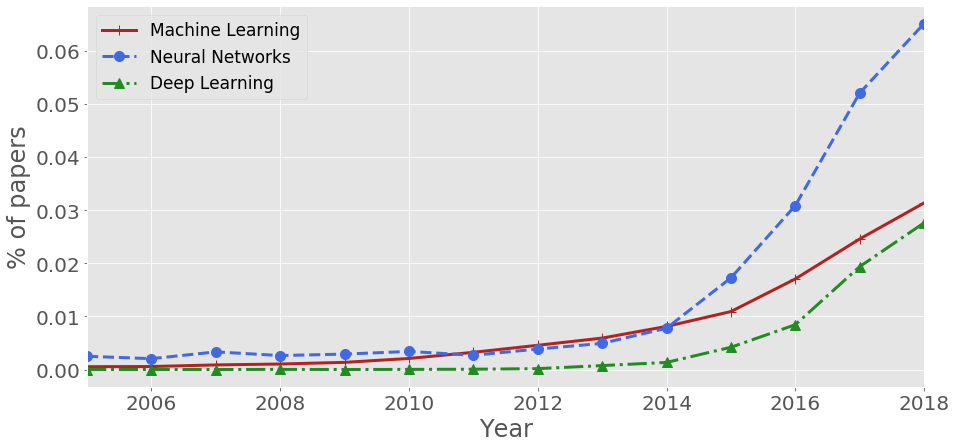

In [42]:
min_yr=2005

fig_all, ax_all = plt.subplots(figsize=(15,7))

papers_percentage = []

for i,df in enumerate(df_all):
    arr = df[df['year']>=min_yr].groupby(['year']).count()['ID']
    arr = pad_count(arr, yrs).values
    tot=df_norm[df_norm['year']>=min_yr]['total'].values
    papers_percentage.append(arr/tot)

    df_plot = pd.DataFrame(
              papers_percentage[i],index=yrs, columns=[df_names[i]]).sort_index( ascending=True)
    df_plot.plot( ax=ax_all, legend=False,
                                            label=df_names[i],
                                           style = styles[i], color=color_list[i],
                                                         linewidth=3, markersize=10)
ax_all.legend(loc=0, prop={'size': 17});
#ax_all.set_title('Fig.1 - Percentuale di articoli Arxiv con "Machine Learning", \n "Deep Learning" o "Neural Networks" in titolo o abstract',\
#                fontsize=18);
ax_all.set_xlabel('Year', fontsize=24);
ax_all.set_ylabel('% of papers', fontsize=24);
ax_all.tick_params(labelsize=20)
ax_all.set_xlim([2005,2018]);

In [38]:
#fig_all.savefig('plots/fig1_eng.png')

Quantitative analysis. Growth since 2008

In [43]:
NN_2017 = df_NN.groupby(['year']).count()['ID'][2017]
NN_2007 = df_NN.groupby(['year']).count()['ID'][2008]
print(NN_2017)
print(NN_2007)
print (NN_2017/NN_2007)


4749
117
40.58974358974359


Ratio of papers in the last 10 years

In [44]:
ML_2017 = df_ML.groupby(['year']).count()['ID'][2017]
ML_2007 = df_ML.groupby(['year']).count()['ID'][2008]
print(ML_2017)
print(ML_2007)
print (ML_2017/ML_2007)



2242
46
48.73913043478261


In [45]:
DL_2017 = df_DL.groupby(['year']).count()['ID'][2017]
DL_2007 = df_DL.groupby(['year']).count()['ID'][2008]
print(DL_2017)
print(DL_2007)
print (DL_2017/DL_2007)


1767
1
1767.0


Comparison: increment in total arxiv papers (from https://arxiv.org/stats/monthly_submissions)

In [46]:
jan_2008 = 4970
dec_2017 = 10332
dec_2017/jan_2008

2.0788732394366196

In [47]:
papers_percentage

# ML, NN, DL

[array([0.00053052, 0.00056072, 0.00086348, 0.00103301, 0.00134534,
        0.00207676, 0.00323793, 0.00455815, 0.00591163, 0.00810725,
        0.01090551, 0.01704573, 0.02456636, 0.03134517]),
 array([0.00249343, 0.002039  , 0.00331389, 0.00262744, 0.00289765,
        0.00340358, 0.00268029, 0.00385564, 0.0049163 , 0.00777427,
        0.01724906, 0.03085633, 0.05203642, 0.06510668]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24567707e-05,
        0.00000000e+00, 1.92292901e-05, 5.39655700e-05, 1.63374667e-04,
        7.38953401e-04, 1.33190491e-03, 4.18404395e-03, 8.43095927e-03,
        1.93616252e-02, 2.76032184e-02])]

In [48]:
# % Increment in NN from 2008 to 2017

papers_percentage[1][-1]/papers_percentage[1][1]

31.930757032947675

In [49]:
papers_percentage[0][-1]/papers_percentage[0][1]

55.90126910735356

Comments:
- "Neural Networks" sembra presente da prima rispetto a Machine Learning, che inizia negli anni 2000. 
- "Deep Learning" e' una definizione che si afferma solo di recente
- Da cosa e' dominato il trend overall? (Quali campi?)

#### 2. Number of papers by keyword AND category

In [50]:
# To visualize what we plot:
# df.groupby(['year','main_cat']).count()['ID'].unstack().fillna(0)

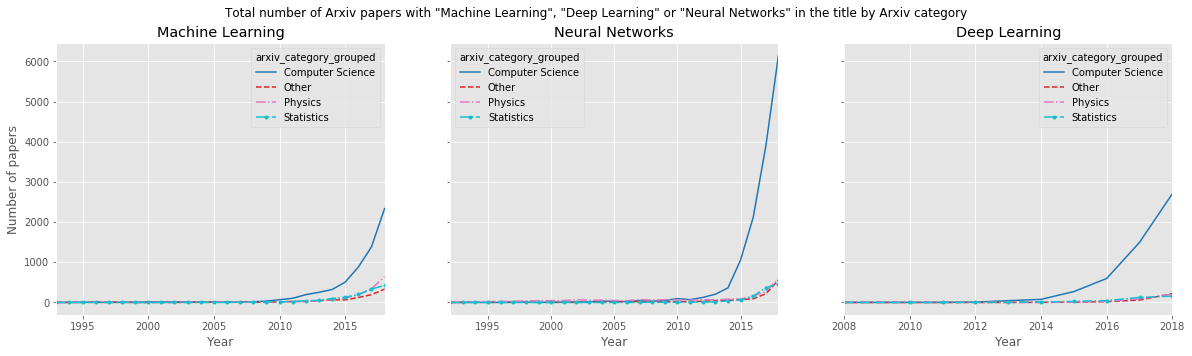

In [51]:
def plot_category():

    fig,axes = plt.subplots(1, 3, sharey=True, figsize=(20,5))

    fig.suptitle('Total number of Arxiv papers with "Machine Learning", "Deep Learning" or "Neural Networks" in the title by Arxiv category')
    for i,df in enumerate(df_all):
        
        
        df.groupby(['year','arxiv_category_grouped']).\
                                            count()['ID'].\
                                            unstack().fillna(0).\
                                            plot(ax = axes[i], style = l_styles, colormap='tab10')
        axes[i].set_xlabel('Year');
        axes[i].set_title(df_names[i])
    axes[0].set_ylabel('Number of papers');
    #axes.set_title('Number of Arxiv papers by Arxiv cathegory');
    return fig, axes


fig_ML, ax_ML = plot_category()

Comments:
- Interessante la differenza di trend in "Machine Learning" per fisica: l'incremento sembra piu' marcato rispetto agli altri due... questione solo di termini o altro?
- Esplosione di neural networks in Computer Science, che domina completamente il trend del grafico cumulativo

#### 3. Number of papers by cathegory, considering all the three keywords together

In [52]:
df_full = pd.concat(df_all, axis=0)
df_full.shape

(35121, 13)

In [53]:
df_full.sort_values(by='date', ascending=False, axis=0).iloc[0:,:]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year
0,1812.08155,2018-12-19T18:50:15Z,Magnetic Resonance Fingerprinting using Recurr...,"Ilkay Oksuz,Gastao Cruz,James Clough,Aurelien ...",http://arxiv.org/abs/1812.08155v1,None,Accepted for ISBI 2018,cs.CV,['cs.CV'],Magnetic Resonance Fingerprinting (MRF) is a n...,cs,Computer Science,2018
1,1812.08119,2018-12-19T17:59:08Z,Adam Induces Implicit Weight Sparsity in Recti...,"Atsushi Yaguchi,Taiji Suzuki,Wataru Asano,Shuh...",http://arxiv.org/abs/1812.08119v1,None,"8 pages, 7 figures, 6 tables, 2018 17th IEEE I...",cs.LG,"['cs.LG', 'cs.CV', 'stat.ML']","In recent years, deep neural networks (DNNs) h...",cs,Computer Science,2018
2,1812.08108,2018-12-19T17:36:36Z,Enhancing Robustness of Deep Neural Networks A...,"Deqiang Li,Qianmu Li,Yanfang Ye,Shouhuai Xu",http://arxiv.org/abs/1812.08108v1,None,"8 pages, 4 figures, AICS 2019",cs.CR,"['cs.CR', '68-06']","Malware continues to be a major cyber threat, ...",cs,Computer Science,2018
3,1812.08052,2018-12-19T16:12:29Z,Multitask Painting Categorization by Deep Mult...,"Simone Bianco,Davide Mazzini,Paolo Napoletano,...",http://arxiv.org/abs/1812.08052v1,None,"11 pages, under review",cs.CV,['cs.CV'],In this work we propose a new deep multibranch...,cs,Computer Science,2018
4,1812.08011,2018-12-19T15:15:55Z,Training Deep Neural Networks with 8-bit Float...,"Naigang Wang,Jungwook Choi,Daniel Brand,Chia-Y...",http://arxiv.org/abs/1812.08011v1,None,NeurIPS 2018 (12 pages),cs.LG,"['cs.LG', 'stat.ML']",The state-of-the-art hardware platforms for tr...,cs,Computer Science,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,adap-org/9305002,1993-06-02T20:55:57Z,Biased Random-Walk Learning: A Neurobiological...,Russell W. Anderson,http://arxiv.org/abs/adap-org/9305002v1,None,In press: Progress in Neural Networks,adap-org,"['adap-org', 'nlin.AO', 'q-bio']",Neural network models offer a theoretical test...,None,Other,1993
3177,comp-gas/9305004,1993-05-27T00:48:00Z,Global Bifurcations in Rayleigh-Benard Convect...,"I. G. Kevrekidis,R. Rico-Martinez,R. E. Ecke,R...",http://arxiv.org/abs/comp-gas/9305004v1,None,Additional figures available via anonymous ftp...,comp-gas,"['comp-gas', 'chao-dyn', 'nlin.CD', 'nlin.CG']","We use nonlinear signal processing techniques,...",None,Other,1993
3178,comp-gas/9305001,1993-05-13T22:26:11Z,Identification of Continuous-Time Dynamical Sy...,"Robert M. Farber,Alan S. Lapedes,Ramiro Rico-M...",http://arxiv.org/abs/comp-gas/9305001v1,None,Postscript file,comp-gas,"['comp-gas', 'adap-org', 'nlin.AO', 'nlin.CG']",Time-delay mappings constructed using neural n...,None,Other,1993
3179,cond-mat/9304026,1993-04-16T07:43:08Z,Transition from regular to complex behaviour i...,"A. Crisanti,M falcioni,A. Vulpiani",http://arxiv.org/abs/cond-mat/9304026v1,J.Phys. A26 (1993) 3441-3454,"18 pages + 6 figures, TeX dialect: Plain TeX +...",cond-mat,['cond-mat'],We study the long time behaviour of the transi...,phys,Physics,1993


In [65]:
df_full[df_full['year']>=2005].groupby(['year','arxiv_category_grouped']).count()['ID'].unstack()

arxiv_category_grouped,Computer Science,Other,Physics,Statistics
year,,,,
2005,39.0,22.0,53.0,NaN
2006,27.0,24.0,51.0,NaN
2007,60.0,32.0,78.0,9.0
2008,51.0,23.0,74.0,16.0
2009,83.0,23.0,80.0,19.0
2010,164.0,31.0,73.0,18.0
2011,174.0,42.0,86.0,30.0
2012,326.0,57.0,94.0,48.0
2013,501.0,89.0,105.0,72.0


In [66]:
df_grouped = df_full[df_full['year']>=2005].groupby(['year','arxiv_category_grouped']).count()['ID'].\
                                                    unstack().fillna(0)
    
df_grouped

arxiv_category_grouped,Computer Science,Other,Physics,Statistics
year,,,,
2005,39.0,22.0,53.0,0.0
2006,27.0,24.0,51.0,0.0
2007,60.0,32.0,78.0,9.0
2008,51.0,23.0,74.0,16.0
2009,83.0,23.0,80.0,19.0
2010,164.0,31.0,73.0,18.0
2011,174.0,42.0,86.0,30.0
2012,326.0,57.0,94.0,48.0
2013,501.0,89.0,105.0,72.0


In [55]:
cs_vals = df_grouped['Computer Science'].values/df_norm['cs'].values.T
ph_vals = df_grouped['Physics'].values/df_norm['physics'].values.T
stat_vals=df_grouped['Statistics'].values/df_norm['stat'].values.T
other_vals=df_grouped['Other'].values/df_norm['other'].values.T

/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
np.transpose(other_vals).shape

(14,)

In [57]:
df_grouped.columns.values

array(['Computer Science', 'Other', 'Physics', 'Statistics'], dtype=object)

In [67]:
df_plot_2 = pd.DataFrame([ cs_vals,other_vals, stat_vals, ph_vals]).\
fillna(0).transpose()

df_plot_2.index=df_norm['year'].values

df_plot_2.columns=['Computer Science', 'Other', 'Statistics', 'Physics']

df_plot_2

,Computer Science,Other,Statistics,Physics
2005,0.035135,0.002855,0.000000,0.001449
2006,0.017682,0.002565,0.000000,0.001352
2007,0.024590,0.002824,0.040541,0.001941
2008,0.016765,0.001847,0.040201,0.001801
2009,0.020224,0.001647,0.044084,0.001827
2010,0.026789,0.001996,0.029752,0.001612
2011,0.025228,0.002340,0.037037,0.001796
2012,0.033381,0.002788,0.042179,0.001869
2013,0.041487,0.003746,0.050314,0.001989
2014,0.056685,0.004600,0.079890,0.003046


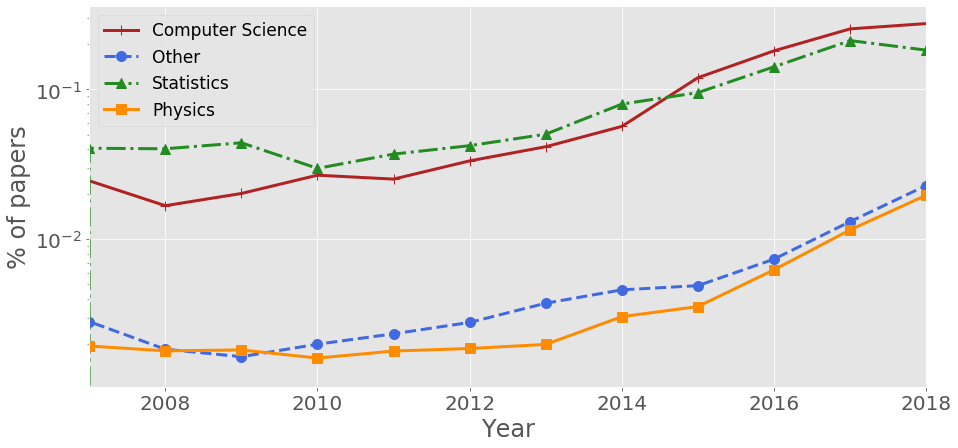

In [59]:
fig_all_cat, ax_all_cat = plt.subplots(figsize=(15,7))

df_plot_2.\
            plot(logy=True, ax=ax_all_cat,
            #label=df_names[i],
            style = styles, color=color_list,
            linewidth=3, markersize=10
            )
ax_all_cat.legend(loc=0, prop={'size': 17});

#ax_all_cat.set_title('Fig.2 -  Percentuale di articoli Arxiv con "Machine Learning", \n "Deep Learning" o "Neural Networks" in titolo o abstract, divisi per categoria',                    fontsize=18);
#ax_all_cat.set_title('Fig.2 -  Percentuale di articoli Arxiv con "Machine Learning", \n "Deep Learning" o "Neural Networks" in titolo o abstract, divisi per categoria',                    fontsize=18);
ax_all_cat.set_xlabel('Year', fontsize=24);
ax_all_cat.set_ylabel('% of papers', fontsize=24);
ax_all_cat.set_xlim([2007,2018]);
ax_all_cat.tick_params(labelsize=20)


In [60]:
fig_all_cat.savefig('plots/fig2_eng.png')

In [61]:
print(df_full.groupby(['year','arxiv_category_grouped']).count()['ID'][2017]['Physics'])
print(df_full.groupby(['year','arxiv_category_grouped']).count()['ID'][2008]['Physics'])


702
74


In [62]:
658/71

9.267605633802816

#### 4. Physics only

In [85]:
df_full_phys = df_full[df_full['arxiv_category']=='phys']

In [86]:
df_full_phys['primary_cat'].unique()

array(['cond-mat.str-el', 'cond-mat.dis-nn', 'physics.data-an',
       'physics.app-ph', 'astro-ph.IM', 'cond-mat.mtrl-sci',
       'physics.comp-ph', 'nlin.AO', 'quant-ph', 'cond-mat.mes-hall',
       'physics.ao-ph', 'physics.soc-ph', 'physics.chem-ph', 'hep-th',
       'astro-ph.CO', 'astro-ph.HE', 'cond-mat.quant-gas', 'astro-ph.SR',
       'hep-ex', 'physics.flu-dyn', 'astro-ph.GA', 'physics.med-ph',
       'physics.optics', 'physics.bio-ph', 'astro-ph.EP',
       'cond-mat.stat-mech', 'physics.ins-det', 'cond-mat.soft', 'hep-ph',
       'physics.acc-ph', 'physics.space-ph', 'hep-lat', 'physics.geo-ph',
       'physics.ed-ph', 'nucl-ex', 'physics.plasm-ph', 'nucl-th',
       'math-ph', 'gr-qc', 'nlin.CD', 'cond-mat.other', 'physics.hist-ph',
       'physics.gen-ph', 'physics.atom-ph', 'cond-mat.supr-con',
       'astro-ph', 'nlin.PS', 'physics.pop-ph', 'nlin.CG',
       'physics.class-ph', 'cond-mat', 'chem-ph'], dtype=object)

In [87]:
def map_column_phys(cat):
    
    if 'astro-ph' in cat:
        return 'astro-ph'
    elif 'cond-mat' in cat:
        return 'cond-mat'
    else:
        return cat
    
df_full_phys['arxiv_category_phys'] = df_full_phys['primary_cat'].apply(lambda x: map_column_phys(x))

/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [88]:
df_full_phys.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year,arxiv_category_phys
9,1812.05631,2018-12-13T19:00:15Z,Probing transport in quantum many-fermion simu...,"Yi Zhang,Carsten Bauer,Peter Broecker,Simon Tr...",http://arxiv.org/abs/1812.05631v1,None,"7 pages, 5 figures",cond-mat.str-el,"['cond-mat.str-el', 'cond-mat.dis-nn', 'cond-m...",Quantum many-fermion systems give rise to dive...,phys,Physics,2018,cond-mat
10,1812.05625,2018-12-13T19:00:02Z,Neural Network-based Classification of Crystal...,"Pascal Marc Vecsei,Kenny Choo,Johan Chang,Titu...",http://arxiv.org/abs/1812.05625v1,None,"9 pages, 5 figures",cond-mat.dis-nn,['cond-mat.dis-nn'],Machine learning algorithms based on artificia...,phys,Physics,2018,cond-mat


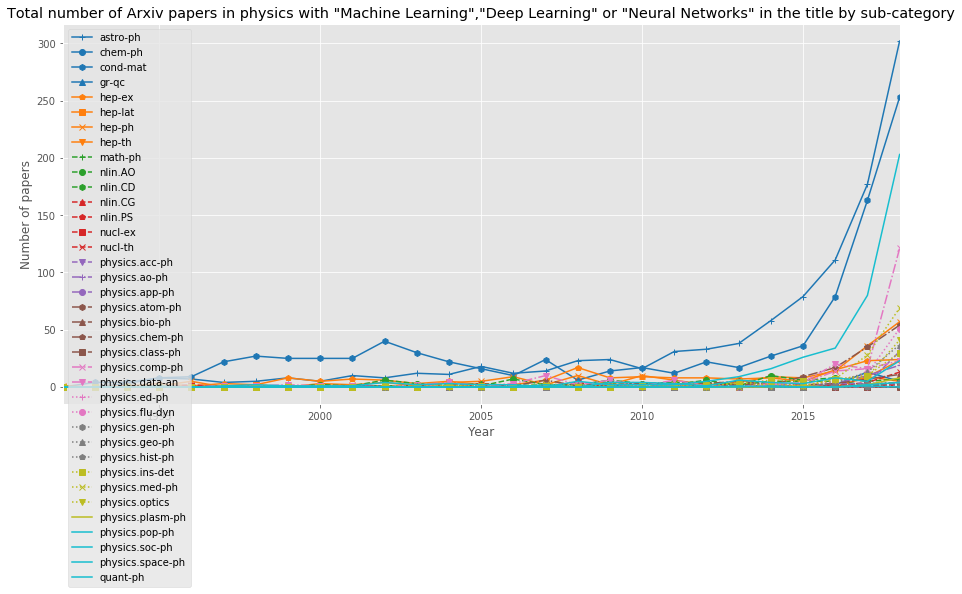

In [89]:
#styles = ['-', '--', ':', '-.', '+-', 'o-', '^-', '']
styles = ['-'+c for c in '+oh^psxv']+ ['--'+c for c in '+oh^psxv']+['-.'+c for c in '+oh^psxv']+[':'+c for c in '+oh^psxv']



fig_phys, ax_phys = plt.subplots(figsize=(15,7))

df_full_phys.groupby(['year','arxiv_category_phys']).count()['ID'].\
                                                    unstack().fillna(0).\
                                                    plot(ax=ax_phys,
                                                    #label=df_names[i],
                                                    style = styles, colormap='tab10'#,
                                                    #marker = markers
                                                   )
ax_phys.legend(loc='upper left');
ax_phys.set_title('Total number of Arxiv papers in physics with "Machine Learning","Deep Learning" or "Neural Networks" in the title by sub-category');
ax_phys.set_xlabel('Year');
ax_phys.set_ylabel('Number of papers');


Comments:
- Too many lines. One idea could be to keep only the categories that had a significant raise in the number of papers. E.g., 10 times more papers in 2018 than in 2008

Sort columns by total number of papers in 2018

In [90]:
df_sorted = df_full_phys[df_full_phys['year']>=2005].groupby(['year','arxiv_category_phys']).count()['ID'].\
                                                    unstack().fillna(0).\
                                                    sort_values(by='year', ascending=False, axis=0)
                                                    #sort_values(by=df_full_phys.last_valid_index(),axis=1)

In [91]:
df_sorted = df_sorted.iloc[:,df_sorted.iloc[0,:].argsort()[::-1]]
df_sorted

arxiv_category_phys,astro-ph,cond-mat,quant-ph,physics.comp-ph,physics.med-ph,hep-ph,physics.chem-ph,physics.flu-dyn,physics.optics,physics.geo-ph,...,math-ph,physics.acc-ph,nlin.CG,nlin.PS,physics.ed-ph,physics.hist-ph,nucl-ex,physics.pop-ph,physics.class-ph,physics.atom-ph
year,,,,,,,,,,,,,,,,,,,,,
2018,302.0,253.0,203.0,121.0,69.0,57.0,54.0,51.0,41.0,37.0,...,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2017,177.0,163.0,80.0,16.0,28.0,36.0,35.0,12.0,9.0,13.0,...,2.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2016,111.0,79.0,34.0,14.0,7.0,14.0,17.0,5.0,6.0,4.0,...,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,79.0,36.0,26.0,3.0,1.0,8.0,9.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2014,58.0,27.0,16.0,3.0,3.0,9.0,2.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013,38.0,17.0,9.0,0.0,0.0,4.0,5.0,0.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012,33.0,22.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,31.0,12.0,2.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,16.0,17.0,2.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Total number of papers in 2018 by category

In [92]:
df_sorted.loc[2018]

arxiv_category_phys
astro-ph            302.0
cond-mat            253.0
quant-ph            203.0
physics.comp-ph     121.0
physics.med-ph       69.0
hep-ph               57.0
physics.chem-ph      54.0
physics.flu-dyn      51.0
physics.optics       41.0
physics.geo-ph       37.0
physics.app-ph       31.0
physics.ins-det      30.0
hep-ex               24.0
physics.data-an      23.0
physics.soc-ph       23.0
hep-th               23.0
physics.ao-ph        19.0
nucl-th              13.0
physics.bio-ph       11.0
physics.plasm-ph      8.0
nlin.AO               7.0
hep-lat               5.0
gr-qc                 5.0
nlin.CD               4.0
physics.space-ph      4.0
physics.gen-ph        4.0
math-ph               3.0
physics.acc-ph        3.0
nlin.CG               2.0
nlin.PS               1.0
physics.ed-ph         1.0
physics.hist-ph       1.0
nucl-ex               1.0
physics.pop-ph        0.0
physics.class-ph      0.0
physics.atom-ph       0.0
Name: 2018, dtype: float64

Growth since 2008 in number of papers

In [93]:
(df_sorted.loc[2018]/(df_sorted.loc[2008]+1)).sort_values(ascending=False)

arxiv_category_phys
physics.comp-ph     121.000000
physics.chem-ph      54.000000
physics.flu-dyn      51.000000
physics.optics       41.000000
cond-mat             36.142857
physics.med-ph       34.500000
quant-ph             33.833333
physics.app-ph       31.000000
physics.ins-det      30.000000
hep-th               23.000000
physics.soc-ph       23.000000
physics.ao-ph        19.000000
astro-ph             12.583333
physics.geo-ph       12.333333
physics.plasm-ph      8.000000
physics.data-an       7.666667
physics.bio-ph        5.500000
hep-ph                5.181818
gr-qc                 5.000000
hep-lat               5.000000
physics.gen-ph        4.000000
physics.space-ph      4.000000
physics.acc-ph        3.000000
math-ph               3.000000
nucl-th               2.600000
nlin.AO               2.333333
nlin.CD               2.000000
nlin.CG               2.000000
hep-ex                1.333333
nlin.PS               1.000000
physics.ed-ph         1.000000
physics.hist-ph    

Keep only categories that had in increment of more than 5 in the last 10 years and that have at least 10 papers in 2018

In [94]:
df_sorted_increment5= df_sorted.loc[:,((df_sorted.loc[2018]/(df_sorted.loc[2008]+1)).sort_values(ascending=False)>5) & (df_sorted.loc[2018]>20) ]
df_sorted_increment5.columns

Index(['astro-ph', 'cond-mat', 'quant-ph', 'physics.comp-ph', 'physics.med-ph',
       'hep-ph', 'physics.chem-ph', 'physics.flu-dyn', 'physics.optics',
       'physics.geo-ph', 'physics.app-ph', 'physics.ins-det',
       'physics.data-an', 'physics.soc-ph', 'hep-th'],
      dtype='object', name='arxiv_category_phys')

In [95]:
df_sorted_increment5

arxiv_category_phys,astro-ph,cond-mat,quant-ph,physics.comp-ph,physics.med-ph,hep-ph,physics.chem-ph,physics.flu-dyn,physics.optics,physics.geo-ph,physics.app-ph,physics.ins-det,physics.data-an,physics.soc-ph,hep-th
year,,,,,,,,,,,,,,,
2018,302.0,253.0,203.0,121.0,69.0,57.0,54.0,51.0,41.0,37.0,31.0,30.0,23.0,23.0,23.0
2017,177.0,163.0,80.0,16.0,28.0,36.0,35.0,12.0,9.0,13.0,3.0,10.0,16.0,5.0,9.0
2016,111.0,79.0,34.0,14.0,7.0,14.0,17.0,5.0,6.0,4.0,0.0,7.0,20.0,8.0,0.0
2015,79.0,36.0,26.0,3.0,1.0,8.0,9.0,1.0,1.0,0.0,0.0,5.0,4.0,3.0,0.0
2014,58.0,27.0,16.0,3.0,3.0,9.0,2.0,3.0,1.0,0.0,0.0,6.0,2.0,4.0,0.0
2013,38.0,17.0,9.0,0.0,0.0,4.0,5.0,0.0,4.0,1.0,0.0,3.0,0.0,6.0,0.0
2012,33.0,22.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
2011,31.0,12.0,2.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,0.0
2010,16.0,17.0,2.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0


(2005.0, 2018.0)

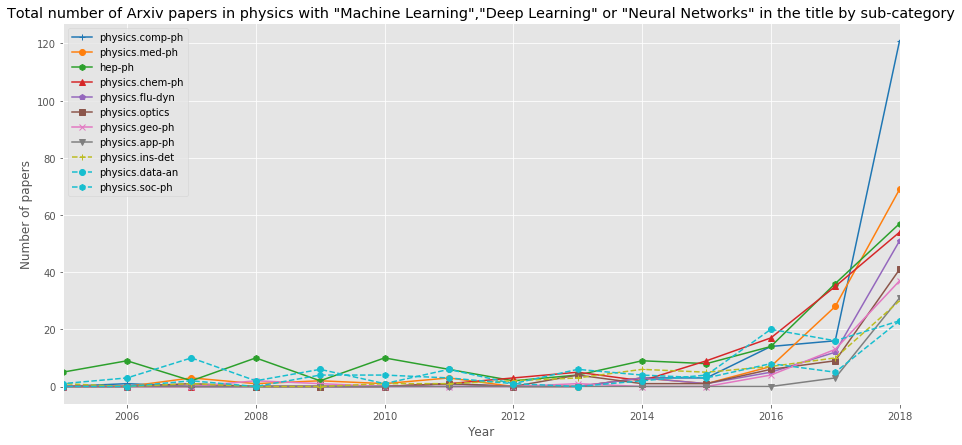

In [96]:
fig_phys_1, ax_phys_1 = plt.subplots(figsize=(15,7))

df_sorted_increment5[['physics.comp-ph', 'physics.med-ph',
       'hep-ph', 'physics.chem-ph', 'physics.flu-dyn', 'physics.optics',
       'physics.geo-ph', 'physics.app-ph', 'physics.ins-det',
       'physics.data-an', 'physics.soc-ph']].plot(ax=ax_phys_1,
                            #label=df_names[i],
                           style = styles, colormap='tab10'#,
                            #marker = markers
                            )
ax_phys_1.legend(loc='upper left');
ax_phys_1.set_title('Total number of Arxiv papers in physics with "Machine Learning","Deep Learning" or "Neural Networks" in the title by sub-category');
ax_phys_1.set_xlabel('Year');
ax_phys_1.set_ylabel('Number of papers');
ax_phys_1.set_xlim()


In [97]:
#fig_phys_1.savefig('plots/n_vs_year_phys.png')

Comments:
- check peaks in condended matter ! (Angelo/Nello ?)

In [98]:
df_sorted_increment5.columns

Index(['astro-ph', 'cond-mat', 'quant-ph', 'physics.comp-ph', 'physics.med-ph',
       'hep-ph', 'physics.chem-ph', 'physics.flu-dyn', 'physics.optics',
       'physics.geo-ph', 'physics.app-ph', 'physics.ins-det',
       'physics.data-an', 'physics.soc-ph', 'hep-th'],
      dtype='object', name='arxiv_category_phys')

In [99]:
df_sorted_increment5['Other']=df_sorted_increment5['physics.comp-ph']+df_sorted_increment5['physics.med-ph']+\
+df_sorted_increment5['physics.chem-ph']+df_sorted_increment5['physics.flu-dyn']+\
df_sorted_increment5['physics.optics']+df_sorted_increment5['physics.geo-ph']+\
df_sorted_increment5['physics.app-ph']+df_sorted_increment5['physics.ins-det']+\
df_sorted_increment5['physics.soc-ph']+df_sorted_increment5['physics.data-an']

/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [100]:
df_sorted_increment5[['astro-ph', 'cond-mat', 'quant-ph','hep-th','Other']]

arxiv_category_phys,astro-ph,cond-mat,quant-ph,hep-th,Other
year,,,,,
2018,302.0,253.0,203.0,23.0,480.0
2017,177.0,163.0,80.0,9.0,147.0
2016,111.0,79.0,34.0,0.0,88.0
2015,79.0,36.0,26.0,0.0,27.0
2014,58.0,27.0,16.0,0.0,24.0
2013,38.0,17.0,9.0,0.0,19.0
2012,33.0,22.0,5.0,0.0,7.0
2011,31.0,12.0,2.0,0.0,16.0
2010,16.0,17.0,2.0,0.0,7.0


In [101]:
astro_vals = df_sorted_increment5['astro-ph'].values[::-1]/df_norm['astro-ph'].values.T
cond_vals = df_sorted_increment5['cond-mat'].values[::-1]/df_norm['cond-mat'].values.T
quant_vals=df_sorted_increment5['quant-ph'].values[::-1]/df_norm['quant-ph'].values.T
hep_vals=df_sorted_increment5['hep-th'].values[::-1]/df_norm['hep-th'].values.T
other_vals=df_sorted_increment5['Other'].values[::-1]/df_norm['other'].values.T

In [102]:
df_plot_3 = pd.DataFrame([ astro_vals,cond_vals, quant_vals, hep_vals, other_vals]).\
fillna(0).transpose()

df_plot_3.index=df_norm['year'].values

df_plot_3.columns=['astro-ph', 'cond-mat', 'quant-ph','hep-th', 'Other']

df_plot_3

,astro-ph,cond-mat,quant-ph,hep-th,Other
2005,0.002086,0.001755,0.000716,0.000000,0.000260
2006,0.001313,0.001086,0.000688,0.000000,0.000427
2007,0.001389,0.002546,0.000000,0.000000,0.001500
2008,0.002298,0.000595,0.001640,0.000000,0.000401
2009,0.002139,0.001371,0.000617,0.000000,0.000931
2010,0.001383,0.001544,0.000612,0.000000,0.000451
2011,0.002633,0.001046,0.000575,0.000000,0.000891
2012,0.002726,0.001806,0.001365,0.000000,0.000342
2013,0.003072,0.001340,0.002244,0.000000,0.000800
2014,0.004634,0.002086,0.003794,0.000000,0.000928


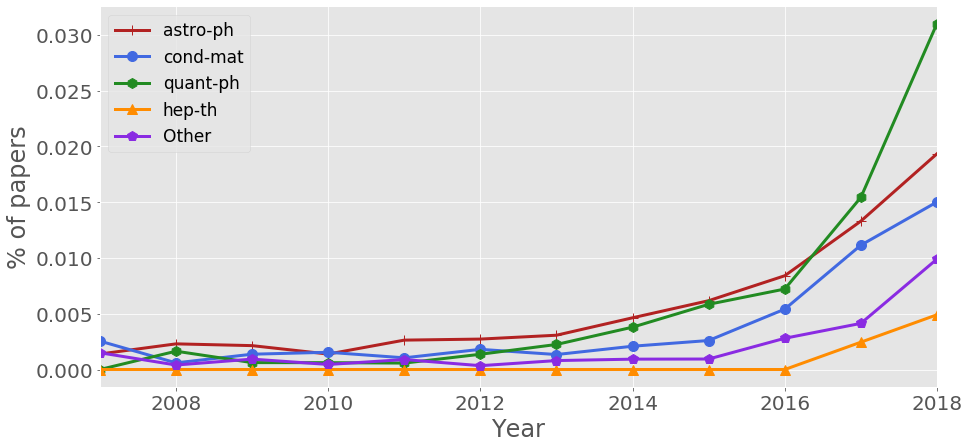

In [107]:
fig_all_3, ax_all_3 = plt.subplots(figsize=(15,7))



df_plot_3.\
                                                    plot(logy=False, ax=ax_all_3,
                                                    #label=df_names[i],
                                                    style = styles, color=color_list,
                                                    linewidth=3, markersize=10#, colormap='tab10'
                                                   )
ax_all_3.legend(loc=0, prop={'size': 17});

#ax_all_3.set_title('Fig.3 -  Percentuale di articoli Arxiv con "Machine Learning", "Deep Learning" \n o "Neural Networks" in titolo o abstract nella categoria "Fisica", divisi per sottocategoria',                    fontsize=18);
ax_all_3.set_xlabel('Year', fontsize=24);
ax_all_3.set_ylabel('% of papers', fontsize=24);
ax_all_3.set_xlim([2007,2018]);
ax_all_3.tick_params(labelsize=20)



In [108]:
#fig_all_3.savefig('plots/fig3_eng.png')

#### Physics - astro-ph

In [207]:
df_full_astro_ph = df_full_phys[df_full_phys['arxiv_category_phys']=='astro-ph']
df_full_astro_ph.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,arxiv_category_grouped,year,arxiv_category_phys
20,1812.05185,2018-12-12T22:46:29Z,Predicting surface wave velocities at gravitat...,"Nikhil Mukund,Michael Coughlin,Jan Harms,Sebas...",http://arxiv.org/abs/1812.05185v1,None,"9 pages, 6 figures",astro-ph.IM,"['astro-ph.IM', 'gr-qc']",Gravitational wave observatories have always b...,phys,Physics,2018,astro-ph
65,1812.03084,2018-12-07T16:19:22Z,Catalog of quasars from the Kilo-Degree Survey...,"S. Nakoneczny,M. Bilicki,A. Solarz,A. Pollo,N....",http://arxiv.org/abs/1812.03084v1,None,Submitted. Data available from the KiDS websit...,astro-ph.IM,"['astro-ph.IM', 'astro-ph.CO', 'cs.LG']",We present a catalog of quasars selected from ...,phys,Physics,2018,astro-ph


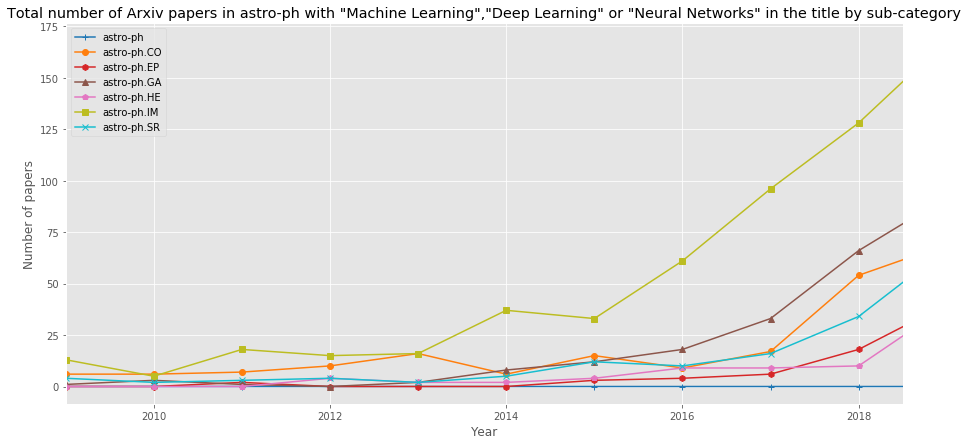

In [208]:
fig_astro, ax_astro = plt.subplots(figsize=(15,7))

df_full_astro_ph.groupby(['year','primary_cat']).count()['ID'].\
                                                    unstack().fillna(0).\
                                                    plot(ax=ax_astro,
                                                    #label=df_names[i],
                                                    style = styles, colormap='tab10'#,
                                                    #marker = markers
                                                   )
ax_astro.legend(loc='upper left');
ax_astro.set_title('Total number of Arxiv papers in astro-ph with "Machine Learning","Deep Learning" or "Neural Networks" in the title by sub-category');
ax_astro.set_xlabel('Year');
ax_astro.set_ylabel('Number of papers');
ax_astro.set_xlim([2009,2018.5]);
